In [ ]:
import tensorflow as tf

In [ ]:
import keras as keras

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Boston.csv")

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = data.drop(columns=["medv"]) # Independent Variables
y = data["medv"] # Target Variable

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [ ]:
from tensorflow.keras.models import Sequential        # sequential means step by step
from tensorflow.keras.layers import Input, Dense      # Dense means output
from tensorflow.keras.optimizers import Adam

In [ ]:
# Model Initialization
model = Sequential() # Empty model with no layers or inputs
model.add(Input(13,)) # Input Layer
model.add(Dense(units=4, activation="relu")) # HL1 with relu activation
model.add(Dense(units = 1)) # Output Layer

In [ ]:
# Model Compilation
# model.compile(optimizer="Adam",loss= "mean_squared_error", metrics="mean_absolute_percentage_error")
model.compile(optimizer=Adam(learning_rate=0.005),loss= "mean_squared_error", metrics="mean_absolute_percentage_error")

In [ ]:
# Model Training
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test))       # epochs means iterations

Epoch 1/300
12/12 [==============================] - 1s 23ms/step - loss: 507.0729 - mean_absolute_percentage_error: 103.3486 - val_loss: 338.3304 - val_mean_absolute_percentage_error: 87.3017
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 268.9684 - mean_absolute_percentage_error: 67.6325 - val_loss: 294.0708 - val_mean_absolute_percentage_error: 69.9520
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 221.4420 - mean_absolute_percentage_error: 62.7183 - val_loss: 199.9831 - val_mean_absolute_percentage_error: 62.6482
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 172.2464 - mean_absolute_percentage_error: 52.7925 - val_loss: 170.2793 - val_mean_absolute_percentage_error: 52.1365
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 152.8872 - mean_absolute_percentage_error: 50.0327 - val_loss: 139.1944 - val_mean_absolute_percentage_error: 48.3839
Epoch 6/300
12/12 [========================

In [ ]:
# Model Visualization

import matplotlib.pyplot as plt
%matplotlib inline

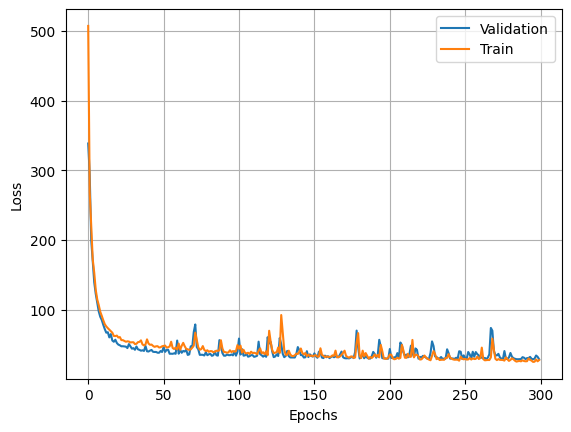

In [ ]:
history = model.history.history
val_loss = history["val_loss"]
val_mape = history["val_mean_absolute_percentage_error"]
train_loss = history["loss"]
train_mape = history["mean_absolute_percentage_error"]


plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

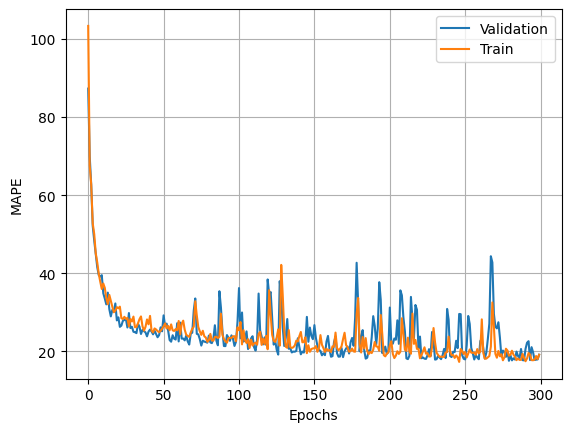

In [ ]:
history = model.history.history
val_loss = history["val_loss"]
val_mape = history["val_mean_absolute_percentage_error"]
train_loss = history["loss"]
train_mape = history["mean_absolute_percentage_error"]


plt.plot(val_mape)
plt.plot(train_mape)
plt.xlabel("Epochs")
plt.ylabel("MAPE")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

In [ ]:
# Predictions

from sklearn.metrics import r2_score

In [ ]:
preds = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
preds

array([[13.333621 ],
       [27.421553 ],
       [35.65127  ],
       [17.40803  ],
       [30.740873 ],
       [38.146397 ],
       [26.556702 ],
       [ 7.9665747],
       [14.527154 ],
       [30.28777  ],
       [26.95135  ],
       [21.900099 ],
       [15.850503 ],
       [28.157484 ],
       [16.518883 ],
       [20.430264 ],
       [20.611261 ],
       [34.487255 ],
       [18.572783 ],
       [15.000941 ],
       [16.182827 ],
       [24.442759 ],
       [31.783491 ],
       [35.682938 ],
       [31.32297  ],
       [21.912497 ],
       [18.322485 ],
       [22.792198 ],
       [22.621595 ],
       [20.622587 ],
       [27.696766 ],
       [32.906982 ],
       [13.321364 ],
       [22.040106 ],
       [22.63634  ],
       [31.488197 ],
       [27.587175 ],
       [19.719957 ],
       [16.871593 ],
       [36.710697 ],
       [28.370852 ],
       [17.734688 ],
       [19.800608 ],
       [37.062508 ],
       [ 7.6622744],
       [25.382177 ],
       [22.566008 ],
       [26.15

In [ ]:
r2_score(y_true = y_test, y_pred = preds.flatten())

0.6441973312512759